<a href="https://colab.research.google.com/github/Dharani220/TitanicClassification/blob/main/Titanic_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Data Preparation and Cleaning**

Data Cleaning is an important step and time-consuming step in data analysis. Formatting issues (e.g., rows and columns merged), missing data, duplicated rows, spelling mistakes, and so on could all be present. These challenges could make data analysis complex. Here we will address some of those.

The import numpy portion of the code tells Python to bring the NumPy library into your current environment.The as np portion of the code then tells python to give numpy the alias of np

pandas is a popular Python-based data analysis toolkit which can be imported using import pandas as pd . It presents a diverse range of utilities, ranging from parsing multiple file formats to converting an entire data table into a NumPy matrix array

In [9]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

To access data from the CSV file, we require a function read_csv() that retrieves data in the form of the Dataframe.

pd.read_csv(filepath, sep=’ ,’ , header=’infer’, index_col=None, usecols=None, engine=None, skiprows=None, nrows=None)

In [10]:
titanic_df = pd.read_csv('/content/drive/MyDrive/EDA on IMDB/titanic_train.csv')
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Let’s see the shape of the data by using the shape method.

In [11]:
titanic_df.shape

(891, 12)

To print the first five rows we will use the head() function.

In [12]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


To print the last five rows we will use the tail() function.

In [13]:
titanic_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


Let us start by looking at descriptive statistic parameters for the dataset. We will use describe() for this.

In [14]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Now,we will see that what are columns present in the dataframe by using column method

In [15]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

To print some sample rows we will use the sample() function.

In [16]:
titanic_df.sample(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
690,691,1,1,"Dick, Mr. Albert Adrian",male,31.00,1,0,17474,57.0000,B20,S
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
534,535,0,3,"Cacic, Miss. Marija",female,30.00,0,0,315084,8.6625,NaN,S
392,393,0,3,"Gustafsson, Mr. Johan Birger",male,28.00,2,0,3101277,7.9250,NaN,S
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
419,420,0,3,"Van Impe, Miss. Catharina",female,10.00,0,2,345773,24.1500,NaN,S
736,737,0,3,"Ford, Mrs. Edward (Margaret Ann Watson)",female,48.00,1,3,W./C. 6608,34.3750,NaN,S
400,401,1,3,"Niskanen, Mr. Juha",male,39.00,0,0,STON/O 2. 3101289,7.9250,NaN,S
518,519,1,2,"Angle, Mrs. William A (Florence ""Mary"" Agnes H...",female,36.00,1,0,226875,26.0000,NaN,S
211,212,1,2,"Cameron, Miss. Clear Annie",female,35.00,0,0,F.C.C. 13528,21.0000,NaN,S


The info() method prints information about the DataFrame.

The information contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values).

In [17]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [18]:
titanic_df.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


For the Name feature, order_id CA-2014-100111 looks like a duplicate entry. Let's have a look at order_id CA-2014-100111 details.

In [19]:
titanic_df['Name']=='McCormack, Mr. Thomas Joseph'

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Name, Length: 891, dtype: bool

In [20]:
McCormackMrThomasJoseph_data=titanic_df.loc[titanic_df.Name=='McCormack, Mr. Thomas Joseph']

Delete the duplicates in a Dataset by using duplicate()

In [21]:
titanic_df=titanic_df.drop_duplicates(keep='first')
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Missing Values

In [23]:
titanic_df.isna().any()


PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [24]:
titanic_df.shape

(891, 12)

In [25]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


As of now, the features are not having missing values. Let's see it after couple of steps again.

The features Embarked should be numeric. So convert the type of respective features to numeric.

In [26]:
titanic_df['Embarked'] = pd.to_numeric(titanic_df['Embarked'], errors='coerce', downcast="integer")

In [27]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     0 non-null      float64
dtypes: float64(3), int64(5), object(4)
memory usage: 90.5+ KB


We will now check for missing values in our dataset. In case there are any missing entries, we will impute them with appropriate values.We will use the isnull() function for this purpose.

In [28]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked       891
dtype: int64

Oooh! Now the features "Embarked" having missing values as 'NaN'. Clean the NaN values by imputing 0 inplace of 'NaN' using replace()

In [29]:
titanic_df['Embarked']=titanic_df['Embarked'].replace(np.nan,0)

In [30]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [31]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,0.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,0.0


# Titanic classification Analysis and Visualization

visualization is very important. Raw text or numbers can not speak much but figures definitely gives more insights about data.

In [32]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [33]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,0.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,0.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,0.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,0.0


#Univariate Analysis

This type of data consists of only one variable. The analysis of univariate data is thus the simplest form of analysis since the information deals with only one quantity that changes. It does not deal with causes or relationships and the main purpose of the analysis is to describe the data and find patterns that exist within it.The example of a univariate data can be region.

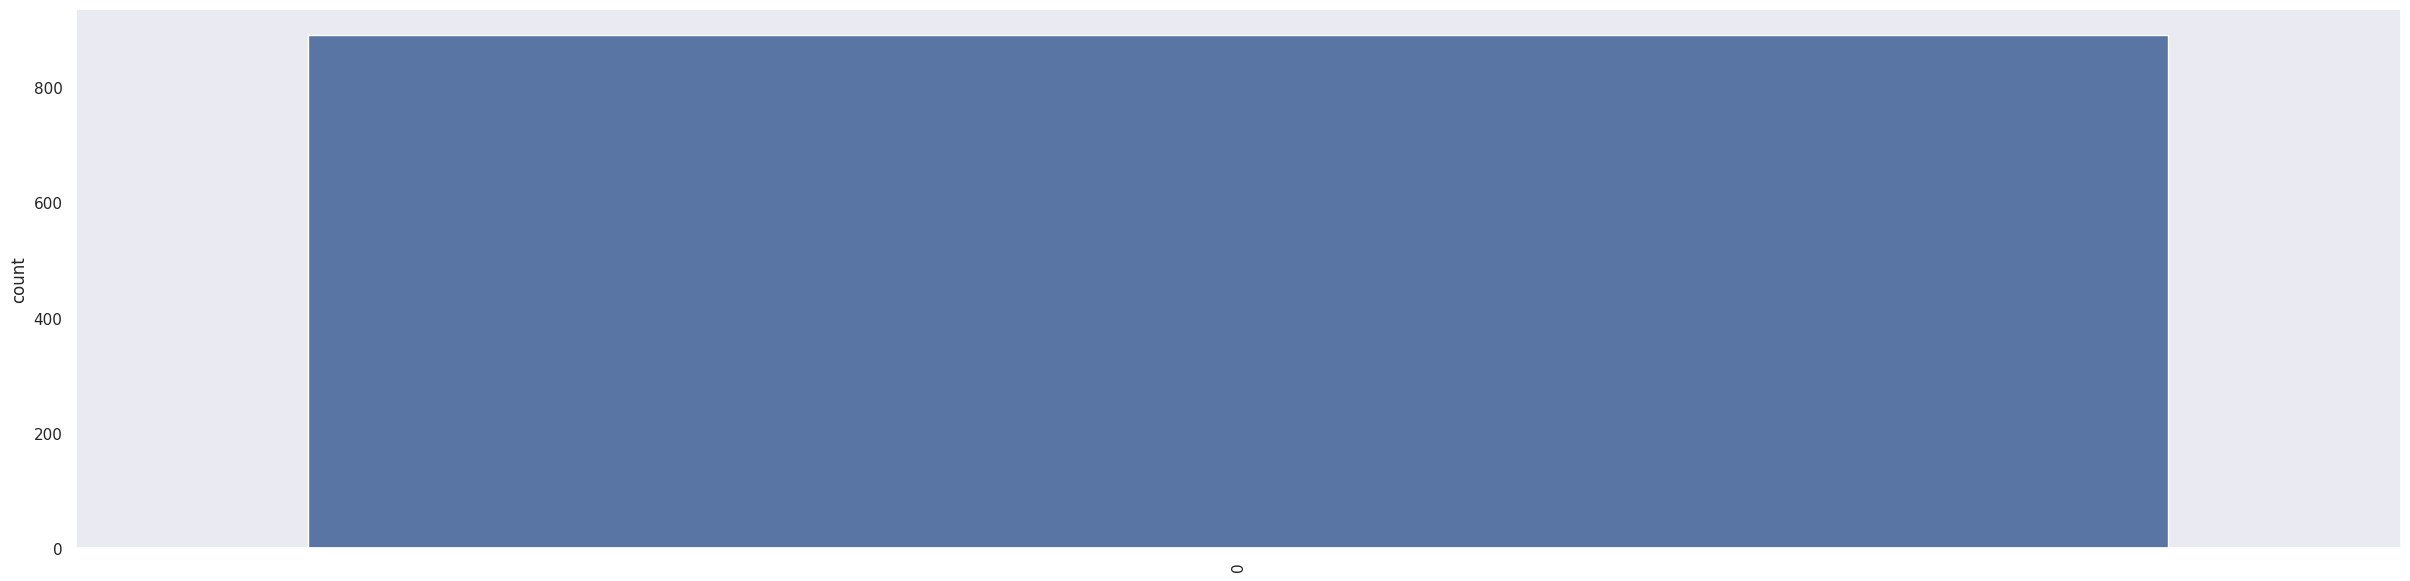

In [34]:
plt.figure(figsize=(30,7))
sns.set(style='dark')
sns.countplot(titanic_df['Age'].sort_values(ascending=False))
plt.xticks(rotation=90)
plt.show()

(array([0, 1, 2]), [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3')])

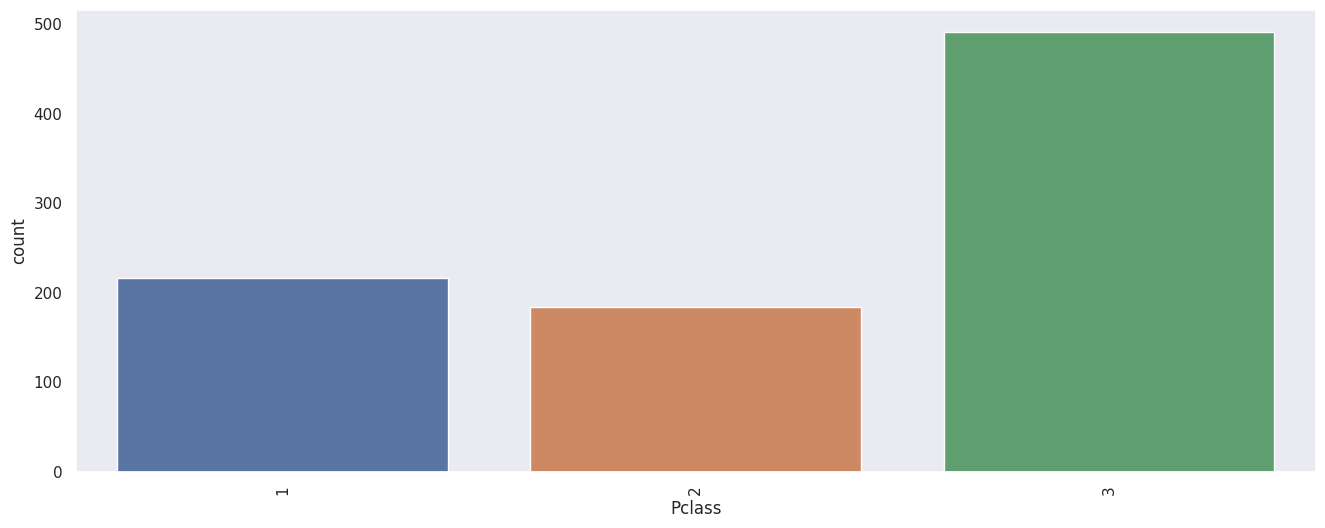

In [35]:
plt.figure(figsize=(16, 6))
plot = sns.countplot(x='Pclass', data=titanic_df);
plt.xticks(rotation = 90)

<Axes: xlabel='Fare', ylabel='Count'>

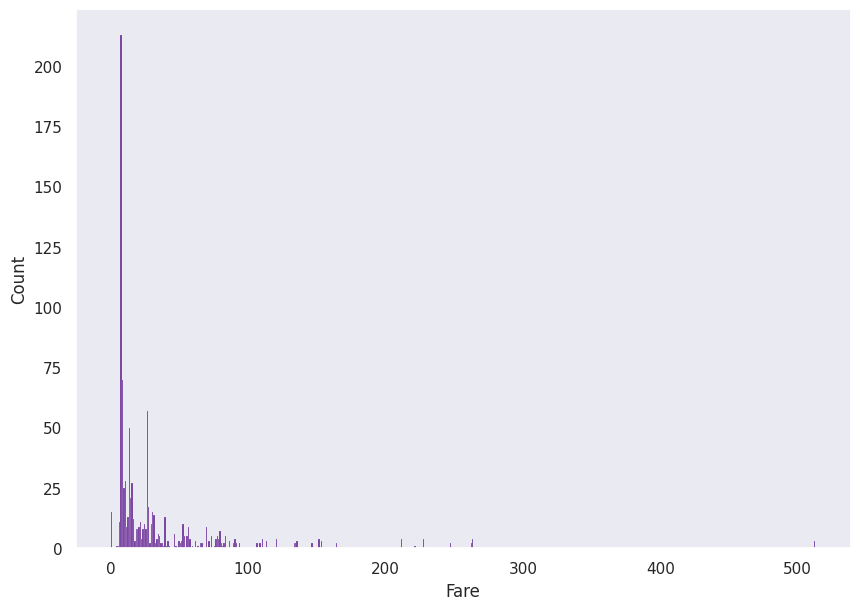

In [36]:
plt.figure(figsize=(10,7))
sns.set(style='dark')
sns.histplot(data=titanic_df,x='Fare',color='indigo',binwidth=1)

In [37]:
AllenMrWilliamHenry_Name = titanic_df.loc[titanic_df.Name=='Allen, Mr. William Henry']
AllenMrWilliamHenry_Name

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,0.0


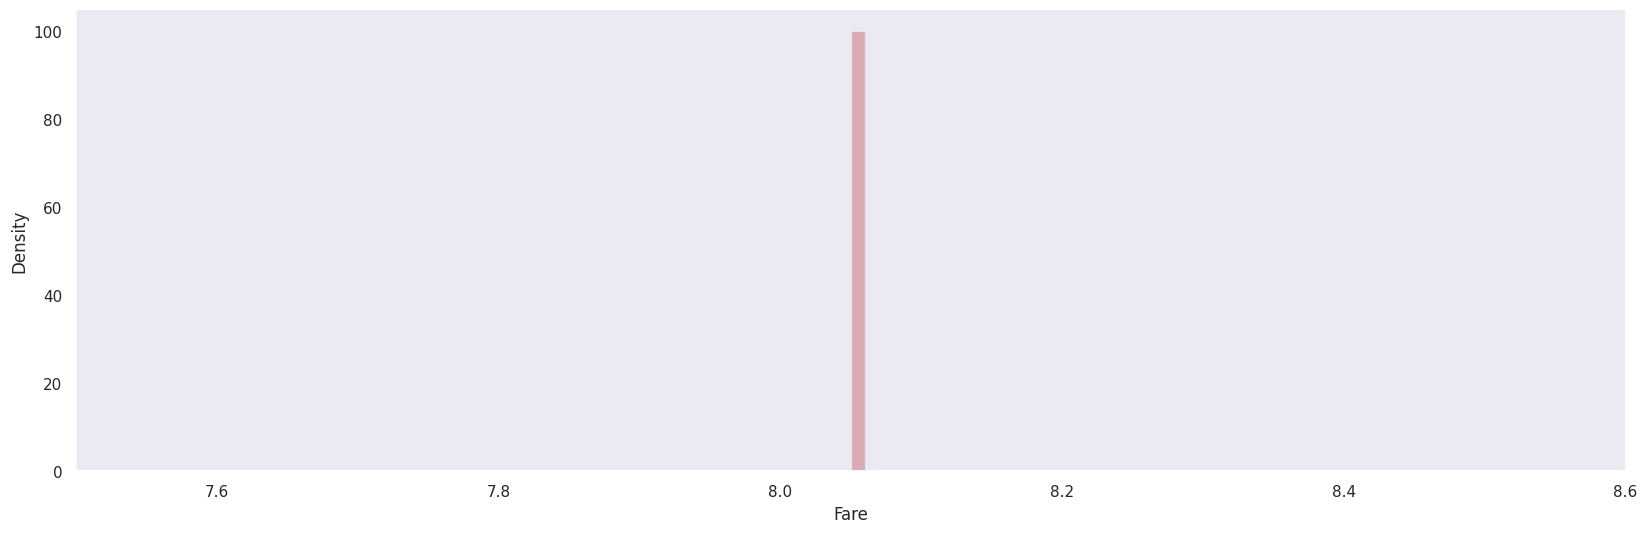

In [43]:
plt.figure(figsize=(20, 6))
plot = sns.distplot(AllenMrWilliamHenry_Name['Fare'], color='r', bins=100)

# Bivariate / Multivariate Analysis.

This type of data involves two different variables. The analysis of this type of data deals with causes and relationships and the analysis is done to find out the relationship among the two variables.Example of bivariate data can be profit and state

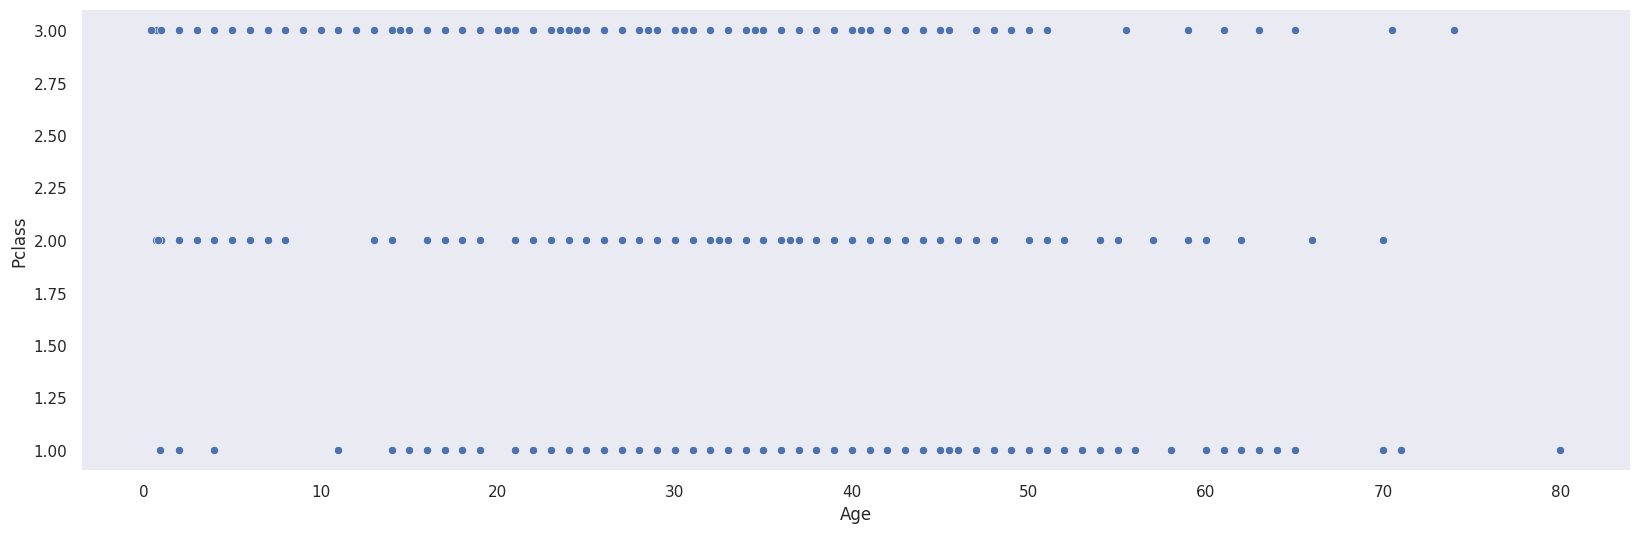

In [45]:
plt.figure(figsize=(20, 6))
sns.scatterplot(x=titanic_df.Age, y=titanic_df.Pclass);

In [46]:
correlations = titanic_df.corr()

In [47]:
correlations

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,NaN
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,NaN
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,NaN
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,NaN
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,NaN
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,NaN
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,NaN
Embarked,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

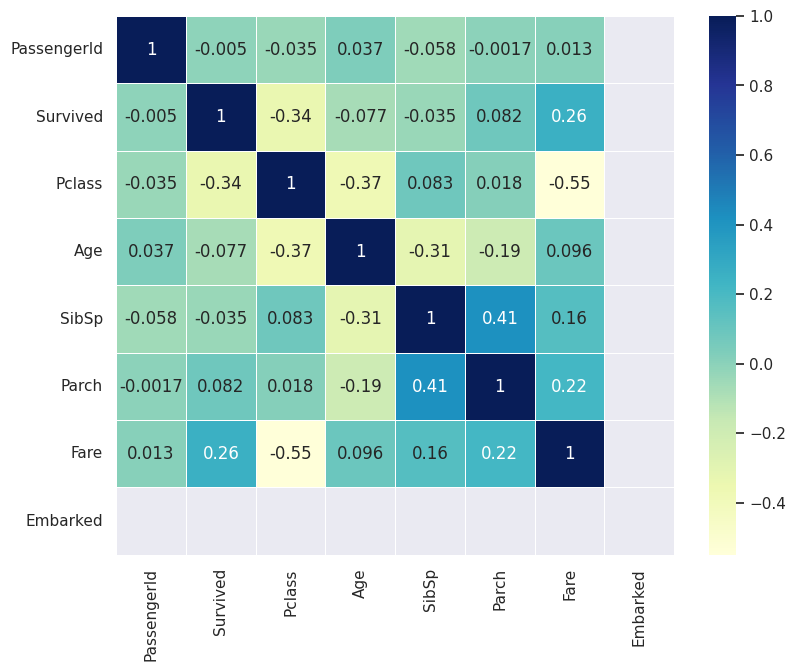

In [48]:
f,ax = plt.subplots(figsize=(9,7))
sns.heatmap(correlations, annot=True, cmap="YlGnBu", linewidths=.5)

In [49]:
a= titanic_df.nlargest(10, 'Fare')
a

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,0.0
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,0.0
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,0.0
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,0.0
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,0.0
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,0.0
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,0.0
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,0.0
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,0.0
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,0.0


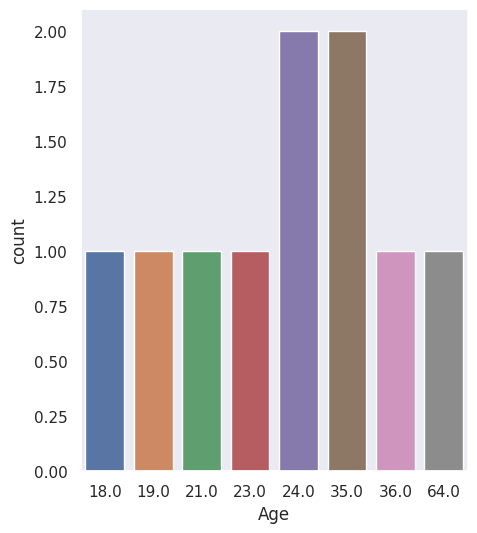

In [50]:
plt.figure(figsize=(5, 6))
plot = sns.countplot(x='Age', data=a)